In [1]:
# Import necessary libraries

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to add a channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Check the shape of the data
print(x_train.shape, x_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [3]:
# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
# Training
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 38s 19ms/step - loss: 0.1542 - accuracy: 0.9523 - val_loss: 0.0440 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0320 - val_accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0243 - val_accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0341 - val_accuracy: 0.9895


In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 2s - loss: 0.0341 - accuracy: 0.9895 - 2s/epoch - 8ms/step
Test accuracy: 0.9894999861717224


313/313 [==============================] - 3s 8ms/step


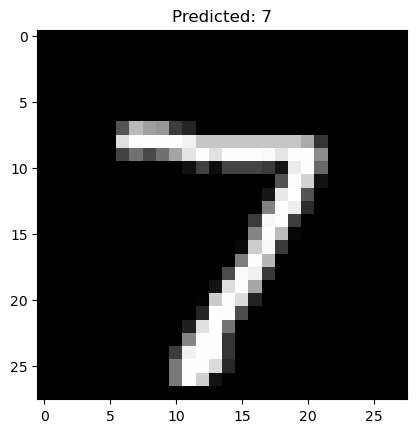

In [6]:
# Predict on the test data
predictions = model.predict(x_test)

# Show the first test image and the prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()


In [7]:
# Save the trained model
model.save("mnist_cnn_model.h5")
